In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/ubuntu/Notebooks/annsa_update/annsa/")

import tensorflow.contrib.eager as tfe
import tensorflow as tf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, LabelBinarizer, StandardScaler
from sklearn.decomposition import PCA

import numpy as np

/home/ubuntu/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.enable_eager_execution()

#### Define neural network

In [3]:
from annsa.model_classes import dnn_model_features,dnn,save_model
from annsa import read_spectrum

In [4]:
scaler=make_pipeline(FunctionTransformer(np.log1p, validate=False))
mlb=LabelBinarizer()
training_data = np.load('path/to/data.npy')
training_keys = np.load('path/to/keys.npy')
training_keys_binarized = mlb.fit_transform(training_keys.reshape([training_data.shape[0],1]))

### Train and save model

In [5]:
model_features = dnn_model_features(learining_rate=4.5e-3,
                                      l2_regularization_scale=1.09e-3,
                                      dropout_probability=1.0-0.96,
                                      batch_size=2**9,
                                      nodes_layer_1=449,
                                      nodes_layer_2=305,
                                      scaler=scaler)

model_features.scaler.fit(training_data[:])
X_tensor = tf.constant(training_data[:])
y_tensor = tf.constant(training_keys_binarized[:])
train_dataset_tensor = tf.data.Dataset.from_tensor_slices((X_tensor, y_tensor))
test_dataset = (training_data[0:100], training_keys_binarized[0:100])

tf.reset_default_graph()
optimizer = tf.train.AdamOptimizer(model_features.learining_rate)
model = dnn(model_features)
all_loss_train, all_loss_test = model.fit_batch(train_dataset_tensor,
                                                test_dataset,
                                                optimizer,
                                                num_epochs=5,
                                                verbose=1,
                                                print_errors=True)



Loss at epoch 1: 4.64 4.66
Loss at epoch 2: 4.39 4.57
Loss at epoch 3: 4.24 4.48
Loss at epoch 4: 4.05 4.36
Loss at epoch 5: 3.79 4.06


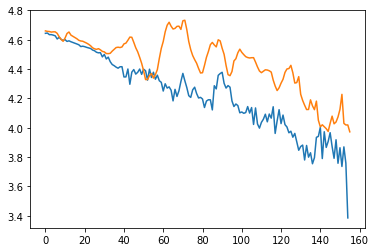

In [6]:
plt.plot(all_loss_train[30:])
plt.plot(all_loss_test[30:])

In [7]:
save_model('final-models','final_model_dnn',model,model_features)